<a href="https://colab.research.google.com/github/soumyajt1991/Facebook-Comment-Volume-Prediction/blob/main/Soumyajit_Das_Team_5_Facebook_Comment_Volume_Prediction_Capstone_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Facebook Comment Volume Prediction**

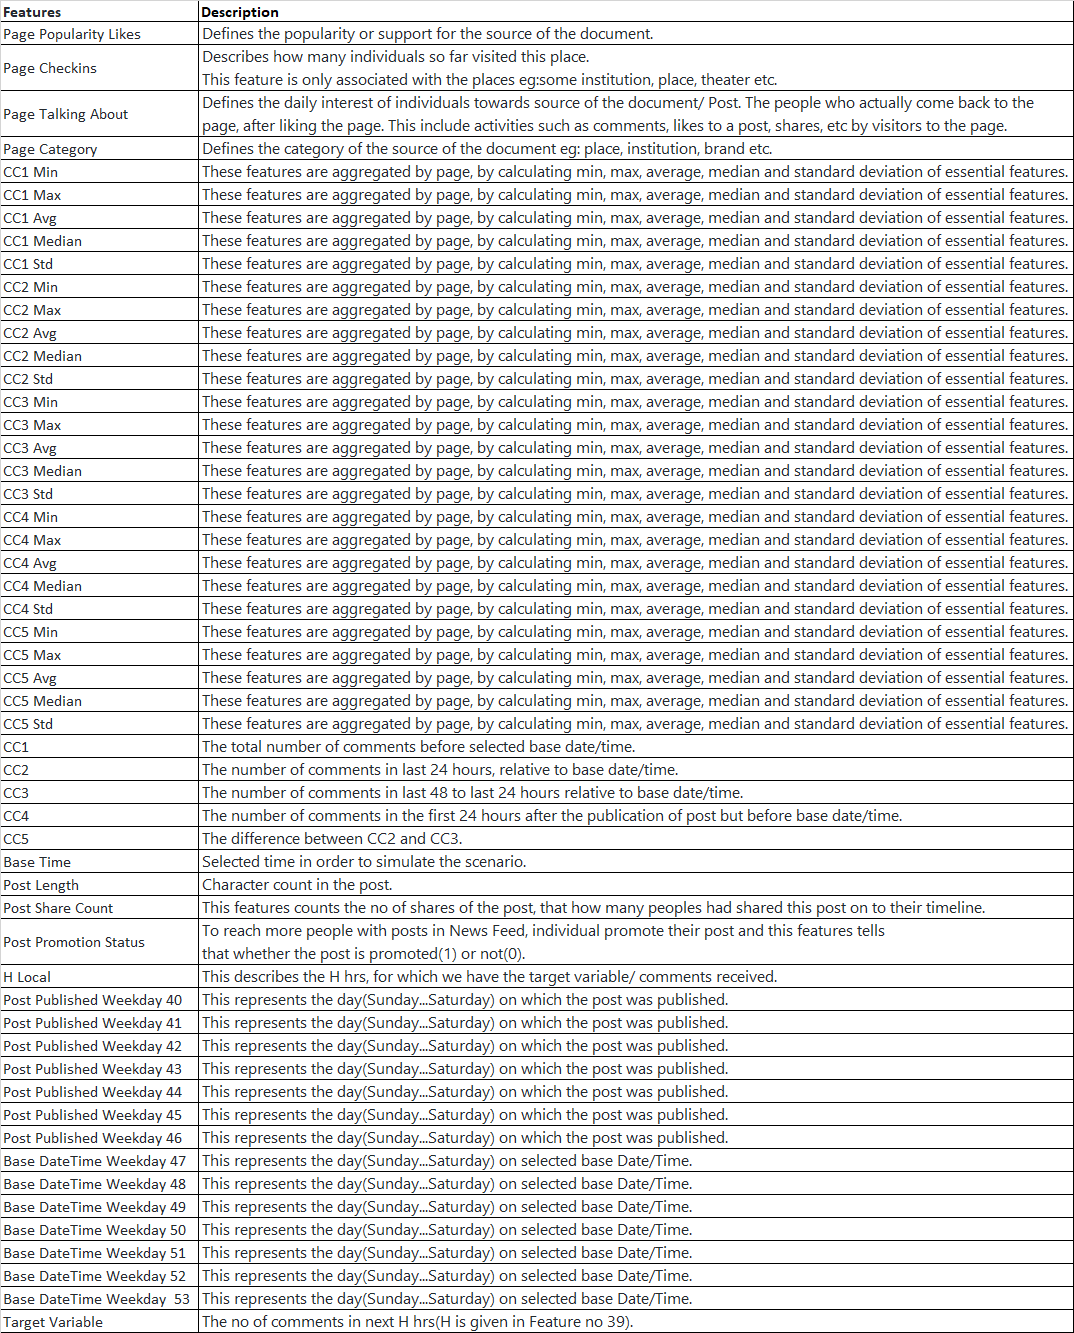

In [1]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
# reading dataset 
import pandas as pd
import numpy as np
fb1_tr = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 2/Day 3/Features_Variant_1.csv',header=None) 
fb_test1 = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 2/Day 3/Test_Case_1.csv',header=None)

In [53]:
columns=['Likes','Checkins','Returns','Category','CC1_min','CC1_max','CC1_avg','CC1_med','CC1_sd','CC2_min','CC2_max','CC2_avg','CC2_med','CC2_sd','CC3_min','CC3_max','CC3_avg','CC3_med','CC3_sd','CC4_min','CC4_max','CC4_avg','CC4_med','CC4_sd','CC5_min','CC5_max','CC5_avg','CC5_med','CC5_sd','CC1','CC2','CC3','CC4','CC5','base_time','post_length','post_share_count','post_promotion_status','H_local','sun_post_day','mon_post_day','tue_post_day','wed_post_day','thu_post_day','fri_post_day','sat_post_day','sun_base_day','mon_base_day','tue_base_day','wed_base_day','thu_base_day','fri_base_day','sat_base_day','output']

In [54]:
fb1_tr.columns=columns

In [55]:
fb1_tr.head()

,Likes,Checkins,Returns,Category,CC1_min,CC1_max,CC1_avg,CC1_med,CC1_sd,CC2_min,CC2_max,CC2_avg,CC2_med,CC2_sd,CC3_min,CC3_max,CC3_avg,CC3_med,CC3_sd,CC4_min,CC4_max,CC4_avg,CC4_med,CC4_sd,CC5_min,CC5_max,CC5_avg,CC5_med,CC5_sd,CC1,CC2,CC3,CC4,CC5,base_time,post_length,post_share_count,post_promotion_status,H_local,sun_post_day,mon_post_day,tue_post_day,wed_post_day,thu_post_day,fri_post_day,sat_post_day,sun_base_day,mon_base_day,tue_base_day,wed_base_day,thu_base_day,fri_base_day,sat_base_day,output
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.85058,0,0,0,0,0,65,166,2,0,24,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.85058,0,0,0,0,0,10,132,1,0,24,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.85058,0,0,0,0,0,14,133,2,0,24,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.85058,7,0,3,7,-3,62,131,1,0,24,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.85058,1,0,0,1,0,58,142,5,0,24,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [56]:
fb1_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 54 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Likes                  40949 non-null  int64  
 1   Checkins               40949 non-null  int64  
 2   Returns                40949 non-null  int64  
 3   Category               40949 non-null  int64  
 4   CC1_min                40949 non-null  float64
 5   CC1_max                40949 non-null  float64
 6   CC1_avg                40949 non-null  float64
 7   CC1_med                40949 non-null  float64
 8   CC1_sd                 40949 non-null  float64
 9   CC2_min                40949 non-null  float64
 10  CC2_max                40949 non-null  float64
 11  CC2_avg                40949 non-null  float64
 12  CC2_med                40949 non-null  float64
 13  CC2_sd                 40949 non-null  float64
 14  CC3_min                40949 non-null  float64
 15  CC

In [57]:
fb1_tr.describe().T

,count,mean,std,min,25%,50%,75%,max
Likes,40949.0,1.313814e+06,6.785752e+06,36.0,36734.000000,292911.000000,1.204214e+06,4.869723e+08
Checkins,40949.0,4.676134e+03,2.059318e+04,0.0,0.000000,0.000000,9.900000e+01,1.863700e+05
Returns,40949.0,4.480025e+04,1.109338e+05,0.0,698.000000,7045.000000,5.026400e+04,6.089942e+06
Category,40949.0,2.425478e+01,1.995058e+01,1.0,9.000000,18.000000,3.200000e+01,1.060000e+02
CC1_min,40949.0,1.586241e+00,2.075317e+01,0.0,0.000000,0.000000,0.000000e+00,2.341000e+03
CC1_max,40949.0,4.433339e+02,4.966952e+02,0.0,45.000000,241.000000,7.170000e+02,2.341000e+03
CC1_avg,40949.0,5.572038e+01,8.693355e+01,0.0,5.527273,23.374101,7.182883e+01,2.341000e+03
CC1_med,40949.0,3.564553e+01,6.996023e+01,0.0,2.000000,12.000000,4.200000e+01,2.341000e+03
CC1_sd,40949.0,6.746415e+01,8.156825e+01,0.0,8.278756,35.069140,1.025550e+02,7.313946e+02
CC2_min,40949.0,2.194681e-01,1.005515e+01,0.0,0.000000,0.000000,0.000000e+00,1.923000e+03


In [58]:
# duplicate observation check
len(fb1_tr[fb1_tr.duplicated()])

8

In [59]:
# removing duplicate observations
fb1_tr=fb1_tr.drop_duplicates()

In [60]:
fb1_tr.shape

(40941, 54)

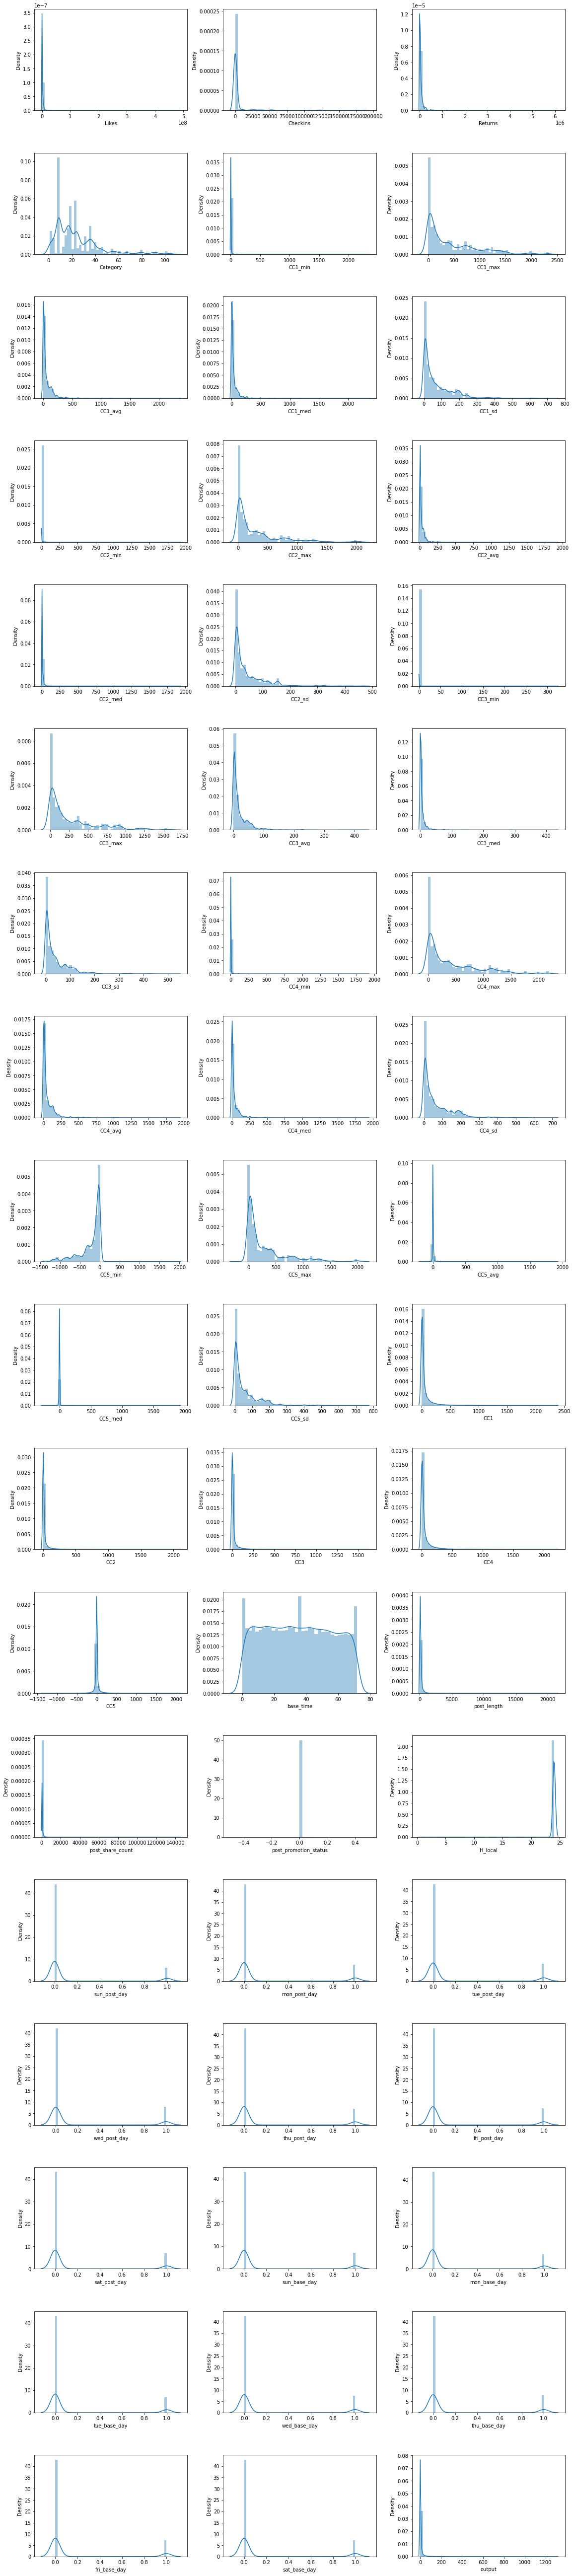

In [17]:
import warnings # ignore warning
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
ig,axs=plt.subplots(ncols=3,nrows=18,figsize=(16, 72))
index=0
axs=axs.flatten()
for i in columns:
    sns.distplot(fb1_tr[i],ax=axs[index])
    index=index+1
plt.tight_layout(pad=0.5,w_pad=1,h_pad=5)

In [61]:
# target variable study
fb1_tr['output'].value_counts()

0      22573
1       5193
2       2624
3       1583
4       1171
       ...  
209        1
145        1
720        1
496        1
336        1
Name: output, Length: 361, dtype: int64

In [62]:
# high number of posts have very few comments

In [63]:
# checking 'category' variable 
fb1_tr['Category'].value_counts()

9     7491
24    4511
18    4301
36    2387
16    1890
      ... 
62      16
63       4
58       2
93       1
83       1
Name: Category, Length: 81, dtype: int64

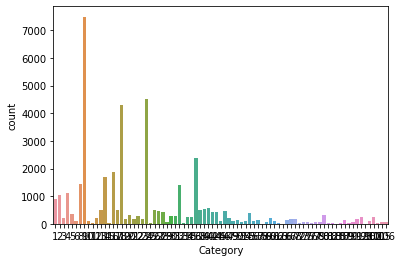

In [64]:
sns.countplot(x=fb1_tr['Category'], data=fb1_tr)
plt.show()

In [65]:
# variable 'category' to be changed to type 'category'

In [66]:
# variable 'post_promotion_status' to be removed as it has only one value

In [67]:
fb1_tr = fb1_tr.drop('post_promotion_status',axis=1)

In [68]:
# variable sun_post_day to sat_post_day and sun_base_day to sat_base_day are binary variable and to be converted to 'category' type

In [69]:
day_cols=['sun_post_day','mon_post_day','tue_post_day','wed_post_day','thu_post_day','fri_post_day','sat_post_day','sun_base_day','mon_base_day','tue_base_day','wed_base_day','thu_base_day','fri_base_day','sat_base_day']

In [70]:
fb1_tr[day_cols]=fb1_tr[day_cols].astype('category')

In [71]:
fb1_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40941 entries, 0 to 40948
Data columns (total 53 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Likes             40941 non-null  int64   
 1   Checkins          40941 non-null  int64   
 2   Returns           40941 non-null  int64   
 3   Category          40941 non-null  int64   
 4   CC1_min           40941 non-null  float64 
 5   CC1_max           40941 non-null  float64 
 6   CC1_avg           40941 non-null  float64 
 7   CC1_med           40941 non-null  float64 
 8   CC1_sd            40941 non-null  float64 
 9   CC2_min           40941 non-null  float64 
 10  CC2_max           40941 non-null  float64 
 11  CC2_avg           40941 non-null  float64 
 12  CC2_med           40941 non-null  float64 
 13  CC2_sd            40941 non-null  float64 
 14  CC3_min           40941 non-null  float64 
 15  CC3_max           40941 non-null  float64 
 16  CC3_avg           4094

In [72]:
dependent_variable = 'output'
independent_variables = list(set(fb1_tr.columns.tolist()) - {dependent_variable})

In [73]:
# Create train data of independent variables
X_train = fb1_tr[independent_variables].values

# Create train data of dependent variable 
y_train = fb1_tr[dependent_variable].values

In [74]:
# doing same operations for test1

In [76]:
fb_test1.columns=columns

In [83]:
fb_test1.head()

,Likes,Checkins,Returns,Category,CC1_min,CC1_max,CC1_avg,CC1_med,CC1_sd,CC2_min,CC2_max,CC2_avg,CC2_med,CC2_sd,CC3_min,CC3_max,CC3_avg,CC3_med,CC3_sd,CC4_min,CC4_max,CC4_avg,CC4_med,CC4_sd,CC5_min,CC5_max,CC5_avg,CC5_med,CC5_sd,CC1,CC2,CC3,CC4,CC5,base_time,post_length,post_share_count,H_local,sun_post_day,mon_post_day,tue_post_day,wed_post_day,thu_post_day,fri_post_day,sat_post_day,sun_base_day,mon_base_day,tue_base_day,wed_base_day,thu_base_day,fri_base_day,sat_base_day,output
0,1340759,33935,49392,9,0.0,768.0,77.200000,36.5,132.861432,0.0,275.0,28.600000,14.0,45.466911,0.0,716.0,47.825000,0.0,124.050572,0.0,744.0,76.000000,36.5,129.477604,-664.0,275.0,-19.225000,5.0,131.036538,0,0,0,0,0,0,150,23,22,0,0,0,0,1,0,0,0,0,0,0,1,0,0,35
1,161455,0,5978,4,3.0,75.0,22.714286,15.0,23.389340,3.0,75.0,16.857143,6.0,24.109444,0.0,15.0,4.142857,0.0,5.488392,3.0,75.0,21.142857,12.0,23.295791,-10.0,75.0,12.714286,5.0,26.266297,22,17,5,20,12,28,20,1,24,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2
2,92385,88,34785,70,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0,0,0,0,0,32,182,1,24,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,395272,0,3406,17,0.0,22.0,4.000000,1.0,6.599663,0.0,22.0,3.111111,1.0,6.740334,0.0,2.0,0.222222,0.0,0.628539,0.0,22.0,3.888889,1.0,6.573422,-2.0,22.0,2.888889,1.0,6.870944,0,0,0,0,0,30,207,1,20,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,4349418,0,614043,9,0.0,958.0,65.974194,24.0,126.960748,0.0,787.0,61.096774,22.0,112.517169,0.0,371.0,4.877419,0.0,33.678238,0.0,912.0,65.587097,24.0,124.844202,-126.0,787.0,56.219355,21.0,107.096415,19,19,0,19,19,13,148,21,6,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0


In [77]:
fb_test1=fb_test1.drop('post_promotion_status',axis=1)

In [78]:
fb_test1[day_cols]=fb_test1[day_cols].astype('category')

In [79]:
fb_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 53 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Likes             100 non-null    int64   
 1   Checkins          100 non-null    int64   
 2   Returns           100 non-null    int64   
 3   Category          100 non-null    int64   
 4   CC1_min           100 non-null    float64 
 5   CC1_max           100 non-null    float64 
 6   CC1_avg           100 non-null    float64 
 7   CC1_med           100 non-null    float64 
 8   CC1_sd            100 non-null    float64 
 9   CC2_min           100 non-null    float64 
 10  CC2_max           100 non-null    float64 
 11  CC2_avg           100 non-null    float64 
 12  CC2_med           100 non-null    float64 
 13  CC2_sd            100 non-null    float64 
 14  CC3_min           100 non-null    float64 
 15  CC3_max           100 non-null    float64 
 16  CC3_avg           100 non-n

In [84]:
# Create test data of independent variables
X_test = fb_test1[independent_variables].values

# Create test data of dependent variable 
y_train = fb1_tr[dependent_variable].values

In [81]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=12,max_leaf_nodes=14,min_samples_leaf=9,min_samples_split=7)
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=12, max_features='auto', max_leaf_nodes=14,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=9,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [82]:
y_pred = regr.predict(X_test)
y_pred_train = regr.predict(X_train)

In [88]:
from sklearn.metrics import mean_squared_error
from numpy import math
from sklearn.metrics import r2_score

In [94]:
n1=len(X_train)+len(X_test)
n2=len(y_train)+len(y_test)
n3=len(fb1_tr.columns)-1

In [96]:
# comparison between train dataset and test dataset

# train data performance
train_MSE=mean_squared_error(y_train, y_pred_train)
train_RMSE=math.sqrt(train_MSE)
train_MAE=np.mean(np.absolute(y_train-y_pred_train))
train_MAPE=(np.mean(np.absolute((y_train-y_pred_train)/y_train)))*100
train_R2=r2_score(y_train, y_pred_train)
train_adjusted_R2=1-((1-train_R2)*(n2-1)/(n2-n3-1))
train_measures=[train_MSE,train_RMSE,train_MAE,train_MAPE,train_R2,train_adjusted_R2]

# test data performance
MSE=mean_squared_error(y_test,y_pred)
RMSE=math.sqrt(MSE)
MAE=np.mean(np.absolute(y_test-y_pred))
MAPE=(np.mean(np.absolute((y_test-y_pred)/y_test)))*100
R2=r2_score(y_test,y_pred)
adjusted_R2=1-((1-R2)*(n2-1)/(n2-n3-1))
test_measures=[MSE,RMSE,MAE,MAPE,R2,adjusted_R2]

In [97]:
# performance comparison table
perf_table=pd.DataFrame() 
perf_table["feature"]=['MSE','RMSE','MAE','MAPE','R2','adjusted_R2']
  
perf_table["train"]=train_measures
perf_table["test"]=test_measures

print(perf_table)

       feature       train         test
0          MSE  429.330605  3882.366581
1         RMSE   20.720295    62.308640
2          MAE    5.114243    24.819852
3         MAPE         inf          inf
4           R2    0.659280     0.450082
5  adjusted_R2    0.658848     0.449384


In [17]:
# checking 'category' variable
fb1_tr['base_time'].value_counts()

42    625
15    622
6     617
31    615
29    614
     ... 
5     513
58    512
71    503
61    496
62    489
Name: base_time, Length: 73, dtype: int64

In [13]:
# checking 'category' variable
fb1_tr['H_local'].value_counts()

24    40163
1        49
2        43
19       40
3        40
17       39
9        37
23       36
22       35
6        35
11       34
20       34
10       33
15       33
16       32
12       32
21       30
4        30
14       29
5        29
18       29
13       28
8        27
7        24
Name: H_local, dtype: int64

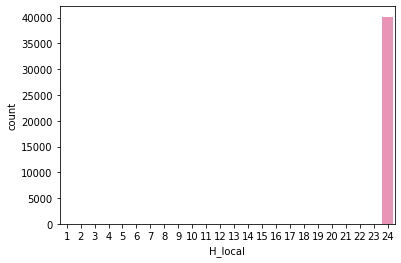

In [14]:
sns.countplot(x=fb1_tr['H_local'], data=fb1_tr)
plt.show()

In [15]:
((40941-40163)*100)/40941

1.900295547250922

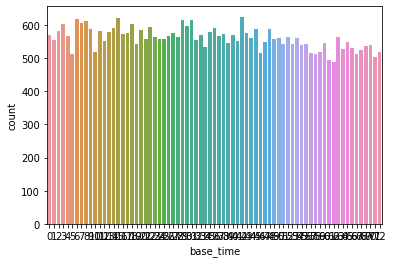

In [18]:
sns.countplot(x=fb1_tr['base_time'], data=fb1_tr)
plt.show()

In [ ]:
# checking 'category' variable
fb1_tr['post_length'].value_counts()

0       4579
14       300
53       286
11       271
58       230
        ... 
975        1
943        1
815        1
783        1
2015       1
Name: post_length, Length: 1477, dtype: int64

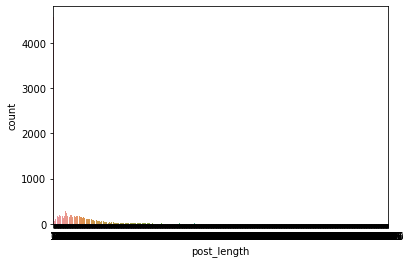

In [ ]:
sns.countplot(x=fb1_tr['post_length'], data=fb1_tr)
plt.show()

In [ ]:
# checking 'category' variable
fb1_tr['post_share_count'].value_counts()

1       8815
2       4486
3       2543
4       1442
5        790
        ... 
2384       1
2352       1
2320       1
2288       1
975        1
Name: post_share_count, Length: 1639, dtype: int64

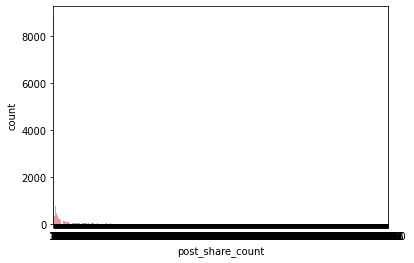

In [ ]:
sns.countplot(x=fb1_tr['post_share_count'], data=fb1_tr)
plt.show()

In [22]:
# checking 'category' variable
fb1_tr['CC1_max'].value_counts()

4.0       852
15.0      626
18.0      620
45.0      540
26.0      474
         ... 
429.0       2
310.0       2
341.0       1
1923.0      1
2341.0      1
Name: CC1_max, Length: 363, dtype: int64

In [ ]:
# checking 'category' variable
fb1_tr['post_promotion_status'].value_counts()

0    40941
Name: post_promotion_status, dtype: int64

In [19]:
columns1=['Likes','Checkins','Returns','Category','base_time','post_length','post_share_count','post_promotion_status','H_local','sun_post_day','mon_post_day','tue_post_day','wed_post_day','thu_post_day','fri_post_day','sat_post_day','sun_base_day','mon_base_day','tue_base_day','wed_base_day','thu_base_day','fri_base_day','sat_base_day']

In [20]:
columns1=['Likes','Checkins','Returns','Category','base_time','post_length','post_share_count','post_promotion_status','H_local']

In [1]:
fig,axs=plt.subplots(ncols=3,nrows=3,figsize=(16, 12))
index=0
axs=axs.flatten()
for i in columns1:
    sns.distplot(fb1_tr[i],ax=axs[index])
    index=index+1
plt.tight_layout(pad=0.5,w_pad=1,h_pad=5)

NameError: ignored

In [ ]:
sns.distplot(fb1_tr['output'])

In [ ]:
len(columns1)

9